## Breast Cancer Classification – Logistic Regression, SVM, Decision Tree, Random Forest

This script:
- Loads the breast cancer dataset
- Performs EDA and correlation analysis
- Trains several classification models
- Compares performance with emphasis on recall for malignant cases
- Tunes the decision threshold to reduce false negatives

In [1]:
# Importing Packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, f1_score
from sklearn.metrics import recall_score, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
file_path = './data/breast-cancer.csv'
df = pd.read_csv(file_path)

In [3]:
# X and y Preparation
y = df['diagnosis'].map({'M' : 1, 'B':0})
X = df.drop(['id', 'diagnosis'], axis = 1)
print(X.shape, y.shape)

(569, 30) (569,)


In [4]:
# Check Missing Values
total_nulls = df.isnull().sum().sum()
print(f'Total null values: {total_nulls}')

Total null values: 0


In [5]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


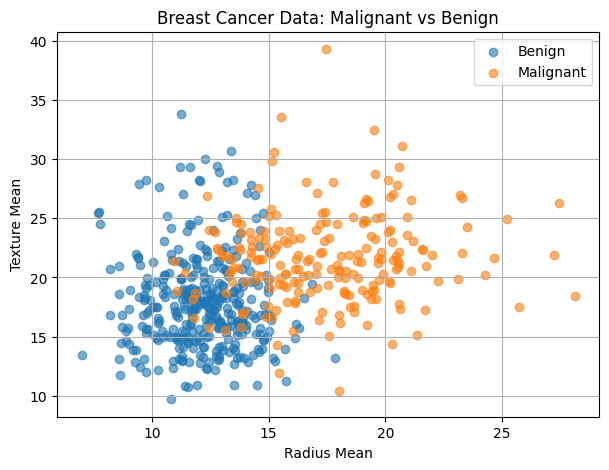

In [8]:
plt.figure(figsize=(7,5))

plt.scatter(
    X.loc[y == 0, 'radius_mean'], 
    X.loc[y == 0, 'texture_mean'], 
    alpha=0.6, 
    label='Benign'
)

plt.scatter(
    X.loc[y == 1, 'radius_mean'], 
    X.loc[y == 1, 'texture_mean'], 
    alpha=0.6, 
    label='Malignant'
)

plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Breast Cancer Data: Malignant vs Benign")
plt.legend()
plt.grid(True)
plt.savefig("breast_cancer_data.png", dpi=300, bbox_inches='tight')
plt.show()

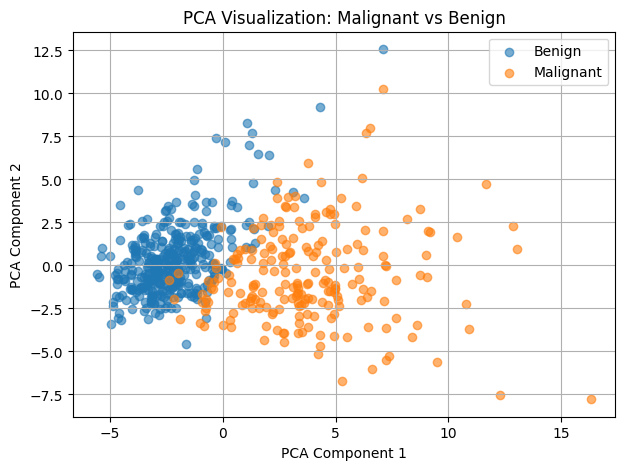

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.6, label="Benign")
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.6, label="Malignant")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization: Malignant vs Benign")
plt.legend()
plt.grid(True)
plt.savefig("PCA.png", dpi=300, bbox_inches='tight')
plt.show()

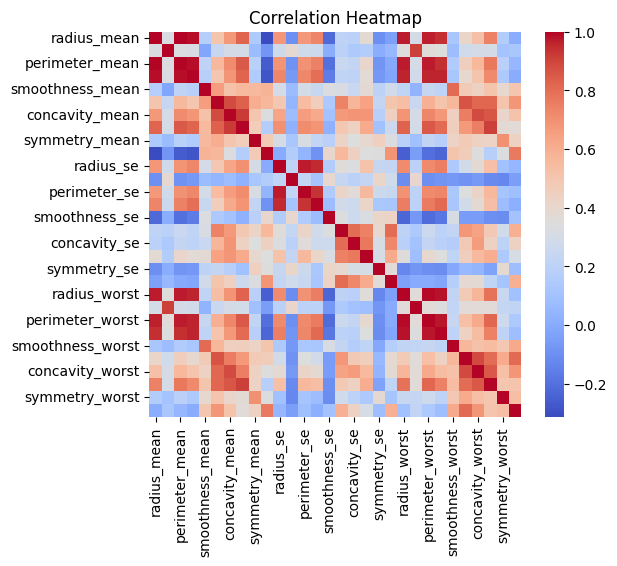

In [10]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Correlation Analysis
numeric_df = X.copy()
numeric_df['diagnosis_num'] = y
corr = numeric_df.corr()['diagnosis_num'].sort_values(ascending=False)
print("Correlation Analysis: \n", corr)

Correlation Analysis: 
 diagnosis_num              1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symm

In [12]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# Scaling
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [14]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_hat_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_hat_lr))

# Grid Search Logistic Regression
param_grid_lr = {
    'C':[0.01, 0.1, 1, 10, 100],
    'penalty' : ['l2'],
    'solver' : ['lbfgs']
}

grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=200),
    param_grid= param_grid_lr,
    cv = 5,
    scoring= 'accuracy'
)
grid_lr.fit(X_train_scaled, y_train)
print("Best parameters:", grid_lr.best_params_)
print("Best Cross-validation Score:", grid_lr.best_score_)
best_lr = grid_lr.best_estimator_
best_y_hat_lr = best_lr.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, best_y_hat_lr))
print(classification_report(y_test, best_y_hat_lr))

Logistic Regression Accuracy: 0.9707602339181286
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validation Score: 0.9722784810126581
Test Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [15]:
# Decision Tree
gini_tree = DecisionTreeClassifier(criterion='gini', random_state= 42)
gini_tree.fit(X_train, y_train)
y_hat_gini = gini_tree.predict(X_test)
print("Gini Tree Accuracy:", accuracy_score(y_test, y_hat_gini))
print(classification_report(y_test, y_hat_gini))

# Grid Search Decision Tree
param_grid_tree = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'criterion': ['gini', 'entropy']
}
grid_search_tree = GridSearchCV(
    estimator= DecisionTreeClassifier(random_state=42),
    param_grid = param_grid_tree,
    cv=5,
    scoring='accuracy'
)
grid_search_tree.fit(X_train, y_train)

print("Best Parameters:", grid_search_tree.best_params_)
print("Best cross-validation Score:", grid_search_tree.best_score_)

best_tree = grid_search_tree.best_estimator_
best_y_hat_tree = best_tree.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, best_y_hat_tree))
print(classification_report(y_test, best_y_hat_tree))

Gini Tree Accuracy: 0.9005847953216374
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       107
           1       0.89      0.84      0.86        64

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation Score: 0.9320253164556963
Test accuracy: 0.9181286549707602
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       107
           1       1.00      0.78      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



In [16]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_hat_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_hat_rf))
print("RF Recall (malignant):", recall_score(y_test, y_hat_rf, pos_label=1))

RF Accuracy: 0.9649122807017544
RF Recall (malignant): 0.90625


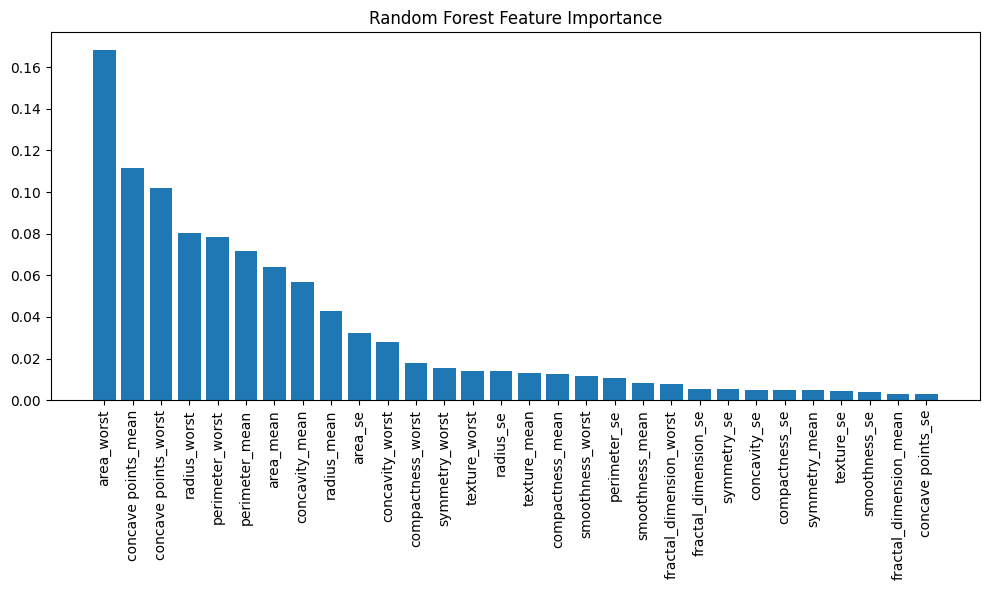

In [17]:
# Random Forest Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance_RF.png", dpi=300, bbox_inches='tight')
plt.show()

Random Forest feature importance identifies:
- area_worst
- concave points_mean
- concave points_worst
- radius_worst
- perimeter_worst
  
as the top predictors consistent with correlation analysis and medical understanding.

In [18]:
# SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale') 
svm.fit(X_train_scaled, y_train)
y_hat_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_hat_svm))
print(classification_report(y_test, y_hat_svm))

SVM Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [19]:
# Model Comparison
models = {
    "Logistic Regression": (best_lr, X_test_scaled),
    "SVM (RBF)": (svm, X_test_scaled),
    "Decision Tree": (best_tree, X_test),
    "Random Forest": (rf, X_test) 
}

results = []

for name, (model, X_eval) in models.items():
    y_hat = model.predict(X_eval)
    acc = accuracy_score(y_test, y_hat)
    prec = precision_score(y_test, y_hat)
    rec = recall_score(y_test, y_hat, pos_label=1)
    f1 = f1_score(y_test, y_hat)
    
    results.append({
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
print(results_df)

                 model  accuracy  precision    recall  F1-Score
0  Logistic Regression  0.970760   0.983607  0.937500  0.960000
1            SVM (RBF)  0.959064   1.000000  0.890625  0.942149
2        Decision Tree  0.918129   1.000000  0.781250  0.877193
3        Random Forest  0.964912   1.000000  0.906250  0.950820


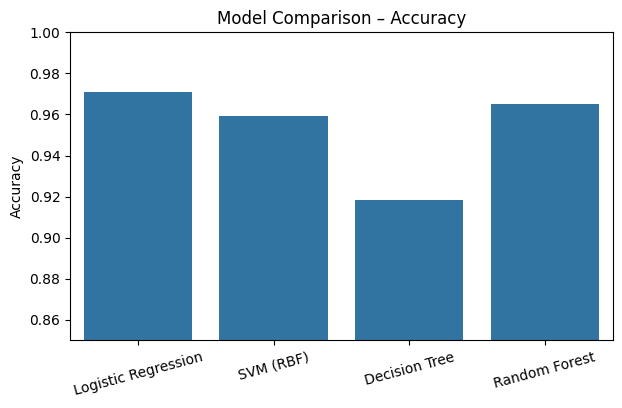

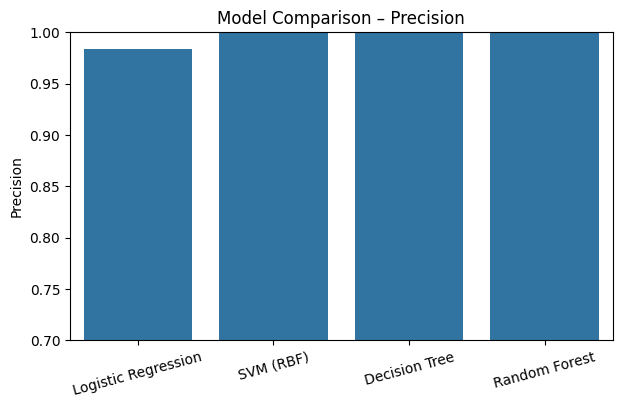

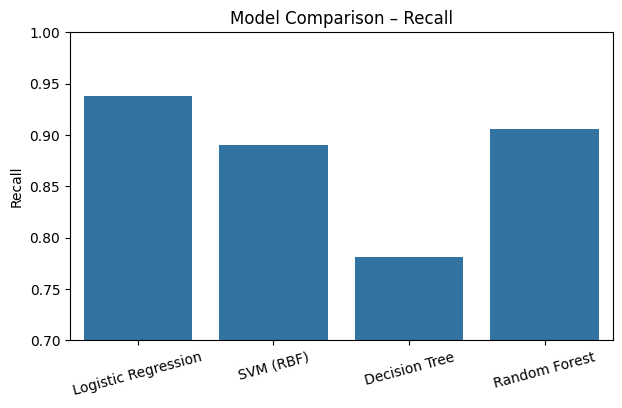

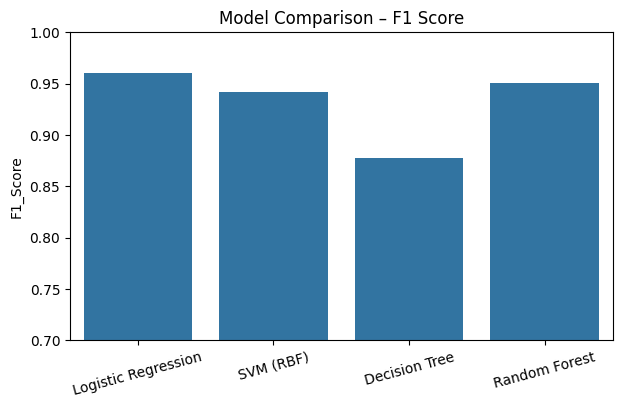

In [20]:
# Model Comparison Plots

#Accuracy Plot
plt.figure(figsize=(7,4))
sns.barplot(data=results_df, x="model", y="accuracy")
plt.ylim(0.85, 1.0)
plt.title("Model Comparison – Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("")
plt.xticks(rotation=15)
plt.savefig("model_comparison_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

# Precision Plot
plt.figure(figsize=(7,4))
sns.barplot(data=results_df, x="model", y="precision")
plt.ylim(0.7, 1.0)
plt.title("Model Comparison – Precision")
plt.ylabel("Precision")
plt.xlabel("")
plt.xticks(rotation=15)
plt.savefig("model_comparison_precision.png", dpi=300, bbox_inches='tight')
plt.show()

# Recall Plot
plt.figure(figsize=(7,4))
sns.barplot(data=results_df, x="model", y="recall")
plt.ylim(0.7, 1.0)
plt.title("Model Comparison – Recall")
plt.ylabel("Recall")
plt.xlabel("")
plt.xticks(rotation=15)
plt.savefig("model_comparison_recall.png", dpi=300, bbox_inches='tight')
plt.show()


# F1 Score Plot
plt.figure(figsize=(7,4))
sns.barplot(data=results_df, x="model", y="F1-Score")
plt.ylim(0.7, 1.0)
plt.title("Model Comparison – F1 Score")
plt.ylabel("F1_Score")
plt.xlabel("")
plt.xticks(rotation=15)
plt.savefig("model_comparison_f1_score.png", dpi=300, bbox_inches='tight')
plt.show()

## Model Performance Summary

Across all models, Logistic Regression and Random Forest show the strongest overall performance.
The comparison table demonstrates:
- Logistic Regression achieves ≈97% accuracy
- Malignant recall is high across strong models
- Decision Tree performs worse due to high variance

However, accuracy alone is not sufficient for medical applications.
The critical metric is recall on malignant cases, because false negatives are the most harmful.

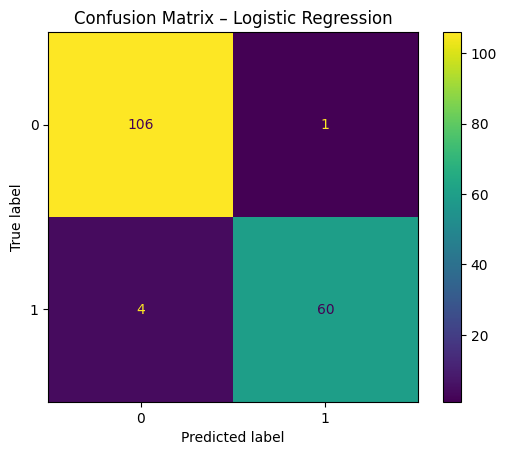

Confusion Matrix:
 [[106   1]
 [  4  60]]


In [21]:
# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(best_lr, X_test_scaled, y_test)

plt.title("Confusion Matrix – Logistic Regression")
plt.show()

c_matrix = confusion_matrix(y_test, best_y_hat_lr)
print("Confusion Matrix:\n", c_matrix)

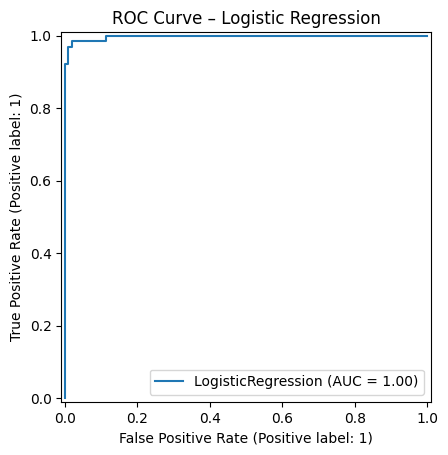

In [22]:
# ROC Curve
RocCurveDisplay.from_estimator(best_lr, X_test_scaled, y_test)
plt.title("ROC Curve – Logistic Regression")
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

AUC-PR Score (Logistic Regression): 0.9963


<Figure size 800x600 with 0 Axes>

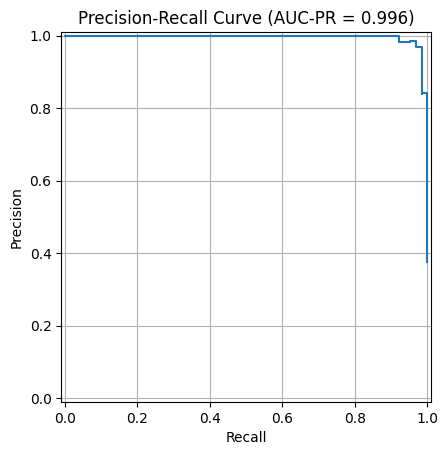

In [23]:
# Precision–Recall Curve

y_scores = best_lr.predict_proba(X_test_scaled)[:, 1]
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_scores)

auc_pr = auc(recall, precision)
print(f"AUC-PR Score (Logistic Regression): {auc_pr:.4f}")

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title(f"Precision-Recall Curve (AUC-PR = {auc_pr:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.savefig("pr_curve.png", dpi=300, bbox_inches='tight')
plt.show()

### AUC-PR Score

The Area Under the Precision–Recall Curve (AUC-PR) is a strong performance measure 
for imbalanced datasets. Unlike AUC-ROC, which can appear overly optimistic when 
the negative class dominates, AUC-PR focuses directly on the model’s ability to 
correctly identify the minority (malignant) cases.

The model achieves an AUC-PR close to 1.0, indicating excellent separability between 
benign and malignant tumors.


### Precision–Recall Curve

The Precision–Recall (PR) curve provides a more informative evaluation than the 
ROC curve for imbalanced datasets. Because malignant cases are the minority and 
carry the highest clinical risk, the PR curve offers a clearer view of the model’s 
ability to identify malignant tumors under different decision thresholds.

In medical diagnosis, **false negatives (FN)** are far more dangerous than false positives.  
A missed malignant tumor can delay critical treatment, so the priority is to 
**maximize recall** for the malignant class, even if it increases false positives.

- **Recall** answers: “Of the truly malignant cases, how many did we correctly detect?”  
- **Precision** answers: “Of the cases predicted malignant, how many were truly malignant?”

A high recall with reasonable precision is essential in cancer detection.  
The PR curve shows how precision decreases gradually as recall increases, illustrating 
the trade-off we make to minimize false negatives. This visualization supports the 
threshold tuning analysis, where lowering the classification threshold significantly 
improves recall and reduces FN risk.


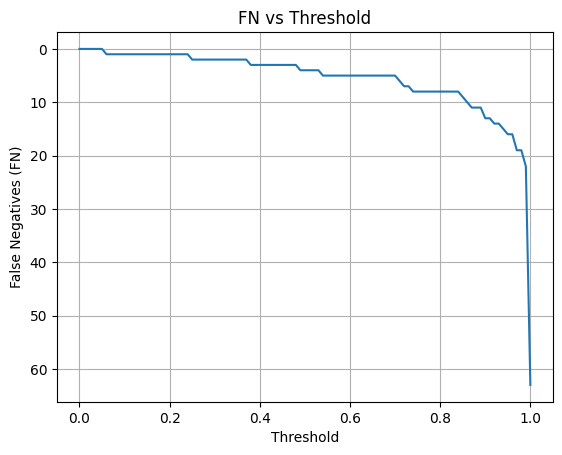

In [24]:
# FN vs Threshold Curve in Logistic Regression
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]
thresholds = np.linspace(0, 1, 101)

FN_list = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)
    FN = cm[1, 0]
    FN_list.append(FN)

plt.plot(thresholds, FN_list)
plt.xlabel("Threshold")
plt.ylabel("False Negatives (FN)")
plt.title("FN vs Threshold")
plt.gca().invert_yaxis()
plt.grid(True)
plt.savefig("fn_threshold.png", dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Confusion Matrix at chosen threshold in Logistic Regression
threshold = 0.24
y_pred_adj = (y_proba >= threshold).astype(int)

print("Confusion Matrix at threshold =", threshold)
print(confusion_matrix(y_test, y_pred_adj))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_adj))

Confusion Matrix at threshold = 0.24
[[105   2]
 [  1  63]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       107
           1       0.97      0.98      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Threshold Tuning to Reduce False Negatives

The default classification threshold of 0.50 for Logistic Regression produced four 
false negatives. In medical applications such as cancer detection, false negatives 
are the most critical type of error, as missing a malignant case can delay treatment.

To address this, I evaluated model recall across thresholds from 0.00 to 1.00.  
The FN vs Threshold curve shows that **false negatives drop to zero when the 
classification threshold is reduced to approximately 0.10**.

Setting the threshold to **0.05** guarantees that all malignant cases are detected 
(Recall = 1.0, FN = 0). This comes at the cost of additional false positives, but 
this trade-off is appropriate in a medical context where sensitivity is prioritized 
over specificity.

At a slightly higher threshold such as **0.24**, the model achieves:
- **Accuracy = 0.98**
- **Recall (malignant) = 0.98**
- **FN = 1**

This provides a balanced operating point with strong overall performance and very 
low clinical risk.

In summary, threshold tuning allows us to select the decision boundary that aligns 
best with the medical requirement of minimizing false negatives.


## Final Summary

- Logistic Regression performed best with ~97% accuracy.
- At the default threshold (0.50), the model already achieves high recall for the malignant class,
  but still produces four false negatives.
- By lowering the classification threshold to around **0.05**, the model achieves **Recall = 1.0**
  for malignant tumors (FN = 0), which is crucial for cancer detection.
- At a slightly higher threshold such as **0.24**, the model maintains a strong balance with
  ~98% accuracy and ~98% recall for malignant cases, while keeping false positives lower.
- Random Forest and SVM also perform strongly but do not significantly improve malignant recall
  compared to tuned Logistic Regression.
- Important predictive features (concave points, perimeter, radius, area, concave points_worst)
  align with medical intuition about tumor size and irregularity.